There are 6 different classes of stars **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)** in the given dataset. 

The dataset is available here: https://www.kaggle.com/deepu1109/star-dataset
 
The dataset contains several features of stars:
1. Absolute temperature (Kelvins)
2. Relative Luminosity (L/Lo)
3. Relative Radius (R/Ro)
4. Absolute Visual magnitude (Mv)
5. Star Color (white,Red,Blue,Yellow,yellow-orange etc)
6. Spectral Class (O,B,A,F,G,K,,M)

The class labels are \\
0. Red Dwarf
1. Brown Dwarf
2. White Dwarf
3. Main Sequence
4. SuperGiants
5. Hypergiants

# Import Libraries

In [ ]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
print("TensorFlow version: ",tf.__version__)  #print the version of tensorflow

TensorFlow version:  2.3.0


# Exploratory Data Analysis

In [ ]:
#read the data
data = pd.read_csv("ANN.csv")
data.head(100)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
95,11250,672.000000,6.9800,-2.30,3,Blue-white,A
96,5112,0.630000,0.8760,4.68,3,Orange-Red,K
97,7720,7.920000,1.3400,2.44,3,yellow-white,F
98,12098,689.000000,7.0100,0.02,3,Blue-white,A


In [ ]:
# display the data statistics
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Text(0.5, 1.0, 'Histogram for radius')

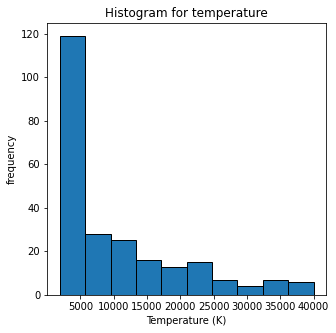

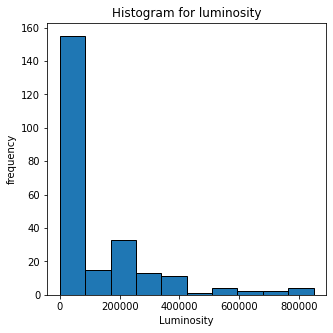

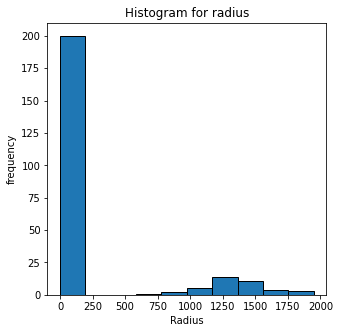

In [ ]:
# print the histogram for temperature, luminosity and radius

plt.figure(figsize=(5,5))
plt.hist(data['Temperature (K)'],edgecolor='black')
plt.xlabel('Temperature (K)')
plt.ylabel('frequency')
plt.title('Histogram for temperature')


plt.figure(figsize=(5,5))
plt.hist(data['Luminosity(L/Lo)'],edgecolor='black')
plt.xlabel('Luminosity')
plt.ylabel('frequency')
plt.title('Histogram for luminosity')


plt.figure(figsize=(5,5))
plt.hist(data['Radius(R/Ro)'],edgecolor='black')
plt.xlabel('Radius')
plt.ylabel('frequency')
plt.title('Histogram for radius')

In [ ]:
#remove the last two columns as they contribute nothing to the analysis
data = data.drop(["Star color","Spectral Class"],1)

In [ ]:
# get the input data and labels
X = data.drop(["Star type"],axis=1) # drop the column "Star type" from the dataset
y = data["Star type"]   #assign the column "Star type" as the output label

In [ ]:
# check number of starts in each class
y.value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [ ]:
# scale the inputs using the preprocessing module in sklear
from sklearn.preprocessing import StandardScaler  #import the StandardScaler function
min_max_scaler = StandardScaler() #define an instance of StandardScaler
x_f = min_max_scaler.fit_transform(X)  #scale the dataframe
#x_f = pd.DataFrame(x_f)  #convert the scaled input to a DataFrame variable

In [ ]:
x_f

array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376],
       [-0.82847728, -0.59862357, -0.45934168,  1.36221308],
       [-0.80749644, -0.59862357, -0.45922929,  1.16717089],
       [-0.89781898, -0.59862357, -0.45933974,  1.49160692],
       [-0.80330027, -0.59862357, -0.45932618,  1.19856793],
       [-0.82459583, -0.59862357, -0.45929324,  1.22140213],
       [-0.82847728, -0.59862357, -0.4593533 ,  1.23852779],
       [-0.82323207, -0.59862357, -0.45932618,  1.24328491],
       [-0.81798686, -0.59862357, -0.45928742,  1.11008537],
       [-0.72357305, -0.59862355, -0.4585511 ,  0.60012142],
       [-0.77298294, -0.5986235 , -0.45881056,  0.7047782 ],
       [-0.77245842, -0.59862357, -0.45915954,  0.83988059],
       [-0.72063573, -0.59862354, -0.45877781,  0.58014148],
       [-0.82323207, -0.59862357, -0.45926805,  0.70401706],
       [-0.75084815, -0.59862355, -0.45907428,  0.82656064],
       [-0.80760134, -0.

In [ ]:
x_f=np.float32(x_f)

In [ ]:
x_f.dtype

dtype('float32')

In [ ]:
# split the data into train and test sets 
from sklearn.model_selection import train_test_split  #import the train_test_split function
x_f_train ,x_f_test , y_f_train, y_f_test = train_test_split(x_f,y, test_size = 0.3, shuffle=True,random_state=24)  

In [ ]:
# print the number of training and test damples
print("Number of training samples: ",len(x_f_train))
print("Number of testing samples: ",len(x_f_test))

Number of training samples:  168
Number of testing samples:  72


# Build the Feedforward Neural Network Model

The Feedforward Neural Network architecture includes:
1. Number of Hidden Layers
2. Number of units (also called as neurons) in each hidden layer
3. Weight initialization
4. Activation function for each layer
5. Number of output layers


In [ ]:
x_f_train.shape # To know the number of input features in the dataset

(168, 4)

In [ ]:
X = tf.constant([1,2,3,4])
print("Before Flatten:", X)
X_f = tf.keras.layers.Flatten()(X)
print("After Flatten: ", X_f)

Before Flatten: tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
After Flatten:  tf.Tensor(
[[1]
 [2]
 [3]
 [4]], shape=(4, 1), dtype=int32)


**Set ANN model architecture specific hyperparameters**

In [ ]:
# Define the ANN model
model = tf.keras.models.Sequential()  #create a sequential pipeline
model.add(tf.keras.layers.Flatten())  # add a Flatten layer 

# You do not need to define the input layer.

# First hidden layer
model.add(tf.keras.layers.Dense(units=64, use_bias=True,
                                kernel_initializer=tf.keras.initializers.random_normal,
                                activation = tf.nn.relu))

# Output Layer. 
model.add(tf.keras.layers.Dense(units=6, use_bias=True, kernel_initializer=tf.keras.initializers.random_normal,
                                activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

# Train the model

In [ ]:
history = model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test))

Epoch 1/20
42/42 [==============================] - 0s 5ms/step - loss: 1.6540 - accuracy: 0.4345 - val_loss: 1.4501 - val_accuracy: 0.4167
Epoch 2/20
42/42 [==============================] - 0s 2ms/step - loss: 1.2354 - accuracy: 0.5238 - val_loss: 1.0555 - val_accuracy: 0.7361
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.9164 - accuracy: 0.7381 - val_loss: 0.7521 - val_accuracy: 0.7361
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.8274 - val_loss: 0.5919 - val_accuracy: 0.7361
Epoch 5/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.8512 - val_loss: 0.5175 - val_accuracy: 0.7500
Epoch 6/20
42/42 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8274 - val_loss: 0.3912 - val_accuracy: 0.9444
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.9048 - val_loss: 0.3780 - val_accuracy: 0.7917
Epoch 8/20
42/42 [==

In [ ]:
# use model.summary() to get a summary of the model architecture
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (4, 4)                    0         
_________________________________________________________________
dense_20 (Dense)             (4, 64)                   320       
_________________________________________________________________
dense_21 (Dense)             (4, 6)                    390       
Total params: 710
Trainable params: 710
Non-trainable params: 0
_________________________________________________________________


'\nLayer - The type of layer used\n\nOutput Shape - The shape of the output of that layer. \n1. Here we have set the batch size to be equal to 4. Hence the output shape of Flatten() is (4,4)\n2. For the hidden layer, we have set the number of neurons to be 64. Hence we have 64 output values as a vector. Hence\n   the shape (4,64)\n3. The output layer has 6 neurons. Hence the shape (4,6)\n\nParam # - Specifies the number of trainable parameters in each layer. \n'

([<matplotlib.axis.XTick at 0x7f43ea2dab70>,
 <a list of 10 Text major ticklabel objects>)

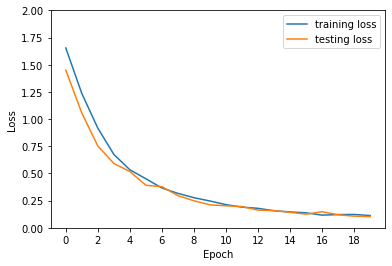

In [ ]:
# plot the training loss and testing loss vs number of epochs
import numpy as np
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='testing loss')
plt.legend()
plt.ylim(0, 2)
#plt.xlim(0, 20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0, 20, step=2))

([<matplotlib.axis.XTick at 0x7f43ea310f60>,
 <a list of 10 Text major ticklabel objects>)

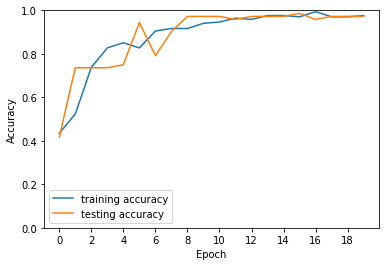

In [ ]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='testing accuracy')
plt.legend()

plt.ylim(0, 1)
#plt.xlim(0, 20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 20, step=2))

# Sensitivity Study / Manual Search for Hyperparameters

***Learning rate***: A model with smaller learning rate will take longer time to converge, whereas a model with a large learning rate may not converge at all.

 We will carry out the training and validation of the model with the following learning rates. All the other hyperparameters are kept the same. 

**Learning rates**: \\
0.0001 \\
0.001 \\
0.01 \\
0.1  
1  
 

In [ ]:
learning_rate = [0.0001,0.001,0.01,0.1,1] # define a list of all learning rates
history=[]    #create an empty list to store the performance metrics for each learning rate
for lr in learning_rate:
  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal,
                                  activation = tf.nn.relu))
  #model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))

  model.compile(optimizer = tf.optimizers.SGD(learning_rate=lr),    # set the learning rate
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  hist = model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)
  # append the histogram instance to a list
  history.append(hist)

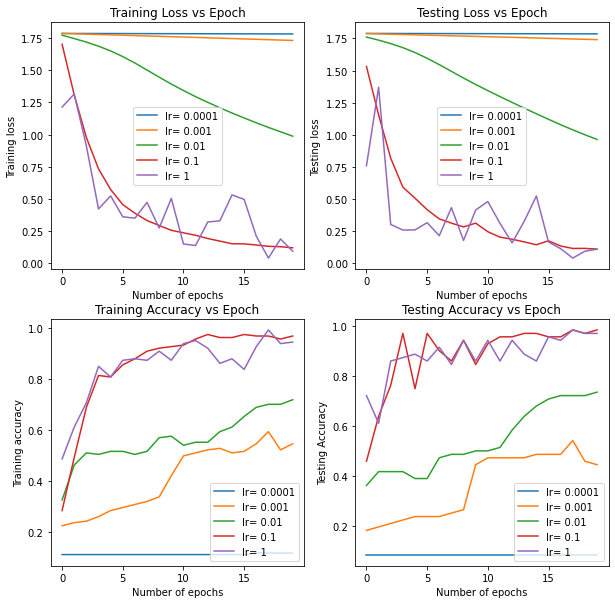

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history[0].history['loss'],label='lr= 0.0001')
plt.plot(history[1].history['loss'],label='lr= 0.001')
plt.plot(history[2].history['loss'],label='lr= 0.01')
plt.plot(history[3].history['loss'],label='lr= 0.1')
plt.plot(history[4].history['loss'],label='lr= 1')
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")
plt.title ("Training Loss vs Epoch")
plt.legend()

plt.subplot(2,2,2)
plt.plot(history[0].history['val_loss'],label='lr= 0.0001')
plt.plot(history[1].history['val_loss'],label='lr= 0.001')
plt.plot(history[2].history['val_loss'],label='lr= 0.01')
plt.plot(history[3].history['val_loss'],label='lr= 0.1')
plt.plot(history[4].history['val_loss'],label='lr= 1')
plt.xlabel("Number of epochs")
plt.ylabel("Testing loss")
plt.title ("Testing Loss vs Epoch")
plt.legend()

plt.subplot(2,2,3)
plt.plot(history[0].history['accuracy'],label='lr= 0.0001')
plt.plot(history[1].history['accuracy'],label='lr= 0.001')
plt.plot(history[2].history['accuracy'],label='lr= 0.01')
plt.plot(history[3].history['accuracy'],label='lr= 0.1')
plt.plot(history[4].history['accuracy'],label='lr= 1')
plt.xlabel("Number of epochs")
plt.ylabel("Training accuracy")
plt.title ("Training Accuracy vs Epoch")
plt.legend()

plt.subplot(2,2,4)
plt.plot(history[0].history['val_accuracy'],label='lr= 0.0001')
plt.plot(history[1].history['val_accuracy'],label='lr= 0.001')
plt.plot(history[2].history['val_accuracy'],label='lr= 0.01')
plt.plot(history[3].history['val_accuracy'],label='lr= 0.1')
plt.plot(history[4].history['val_accuracy'],label='lr= 1')
plt.xlabel("Number of epochs")
plt.ylabel("Testing Accuracy")
plt.title ("Testing Accuracy vs Epoch")
plt.legend()

***Activation function***: Different choices of activation functions are listed below:

1. sigmoid
2. tanh
3. ReLU
4. Leaky ReLU

In [ ]:
activation_function = ['sigmoid','tanh','relu','leaky_relu']  #create a list of activation functions
history=[]
# the activation functions are inside the tf.nn function.
for act in activation_function:
  if act == 'sigmoid':
    activation = tf.nn.sigmoid  
  elif act == 'tanh':
    activation = tf.nn.tanh
  elif act == 'relu':
    activation = tf.nn.relu
  elif act == 'leaky_relu':
    activation = tf.nn.leaky_relu
  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal,
                                  activation = activation))
  #model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))

  model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  hist = model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)
  history.append(hist)

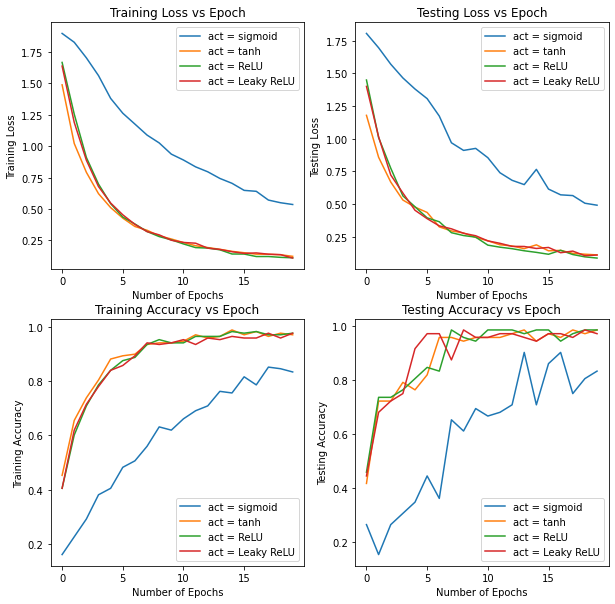

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history[0].history['loss'],label='act = sigmoid')
plt.plot(history[1].history['loss'],label='act = tanh')
plt.plot(history[2].history['loss'],label='act = ReLU')
plt.plot(history[3].history['loss'],label='act = Leaky ReLU')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epoch")
plt.legend()

plt.subplot(2,2,2)
plt.plot(history[0].history['val_loss'],label='act = sigmoid')
plt.plot(history[1].history['val_loss'],label='act = tanh')
plt.plot(history[2].history['val_loss'],label='act = ReLU')
plt.plot(history[3].history['val_loss'],label='act = Leaky ReLU')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Loss")
plt.title("Testing Loss vs Epoch")
plt.legend()

plt.subplot(2,2,3)
plt.plot(history[0].history['accuracy'],label='act = sigmoid')
plt.plot(history[1].history['accuracy'],label='act = tanh')
plt.plot(history[2].history['accuracy'],label='act = ReLU')
plt.plot(history[3].history['accuracy'],label='act = Leaky ReLU')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epoch")
plt.legend()

plt.subplot(2,2,4)
plt.plot(history[0].history['val_accuracy'],label='act = sigmoid')
plt.plot(history[1].history['val_accuracy'],label='act = tanh')
plt.plot(history[2].history['val_accuracy'],label='act = ReLU')
plt.plot(history[3].history['val_accuracy'],label='act = Leaky ReLU')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Accuracy")
plt.title("Testing Accuracy vs Epoch")
plt.legend()

We see that except for sigmoid actvation function, the model gives good results for all the activation functions. 

***Batch size:*** We will compare the performance of standard, stochastic and mini-batch gradient descent. 
1. Standard gradient descent (Batch size = # of training samples)
2. Stochastic gradient descent (Batch size = 1)
3. Mini-Batch gradient descent (Batch size = 4)

In [ ]:
batch_size = [len(x_f_train),1,4] # create a list of batch sizes
history=[]
for bs in batch_size:
  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal,
                                  activation = tf.nn.relu))
  #model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))

  model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  hist = model.fit(x_f_train,y_f_train,batch_size=bs, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)
  history.append(hist)

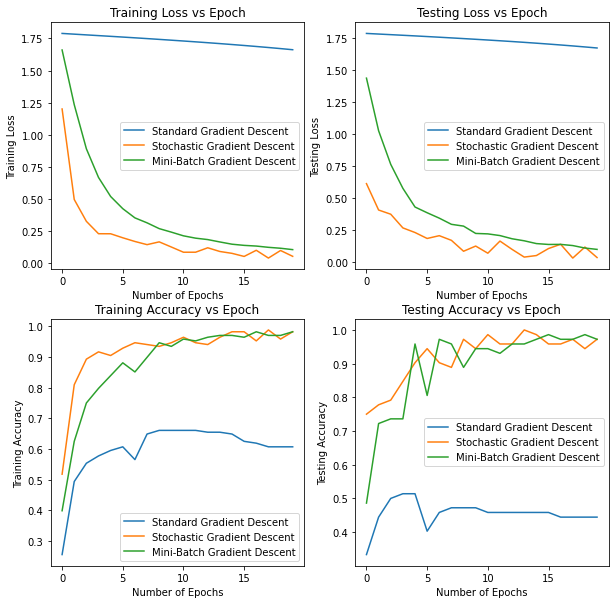

In [ ]:
# add legend
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history[0].history['loss'],label='Standard Gradient Descent')
plt.plot(history[1].history['loss'],label='Stochastic Gradient Descent')
plt.plot(history[2].history['loss'],label='Mini-Batch Gradient Descent')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epoch")
plt.legend()

plt.subplot(2,2,2)
plt.plot(history[0].history['val_loss'],label='Standard Gradient Descent')
plt.plot(history[1].history['val_loss'],label='Stochastic Gradient Descent')
plt.plot(history[2].history['val_loss'],label='Mini-Batch Gradient Descent')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Loss")
plt.title("Testing Loss vs Epoch")
plt.legend()

plt.subplot(2,2,3)
plt.plot(history[0].history['accuracy'],label='Standard Gradient Descent')
plt.plot(history[1].history['accuracy'],label='Stochastic Gradient Descent')
plt.plot(history[2].history['accuracy'],label='Mini-Batch Gradient Descent')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epoch")
plt.legend()


plt.subplot(2,2,4)
plt.plot(history[0].history['val_accuracy'],label='Standard Gradient Descent')
plt.plot(history[1].history['val_accuracy'],label='Stochastic Gradient Descent')
plt.plot(history[2].history['val_accuracy'],label='Mini-Batch Gradient Descent')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Accuracy")
plt.title("Testing Accuracy vs Epoch")
plt.legend()

We ca see that for standard gradient descent it takes a long time to converge whereas stochastic and mini-batch gradient converges quickly. 

The stochastic gradient converges the fastest but there are many oscillations in the loss whereas the mini-batch gives a smoother curve.

Let us see how many epochs does it take the standard gradient descent to converge!

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64,
                                kernel_initializer=tf.keras.initializers.random_normal,
                                activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))
model.compile(optimizer = tf.optimizers.SGD(learning_rate=.1),
     loss = 'sparse_categorical_crossentropy',
     metrics=['accuracy'])
# run the training for 1000 epochs
hist = model.fit(x_f_train,y_f_train,batch_size=len(x_f_train), epochs = 1000, validation_data=(x_f_test,y_f_test),verbose=1)
history.append(hist)

Epoch 1/1000
1/1 [==============================] - 0s 117ms/step - loss: 1.7884 - accuracy: 0.1071 - val_loss: 1.7809 - val_accuracy: 0.2917
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.7830 - accuracy: 0.2738 - val_loss: 1.7764 - val_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.7776 - accuracy: 0.2857 - val_loss: 1.7718 - val_accuracy: 0.3333
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.7721 - accuracy: 0.3810 - val_loss: 1.7670 - val_accuracy: 0.3611
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.7666 - accuracy: 0.3929 - val_loss: 1.7622 - val_accuracy: 0.3472
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.7610 - accuracy: 0.3869 - val_loss: 1.7573 - val_accuracy: 0.3472
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.7553 - accuracy: 0.3810 - val_loss: 1.7523 - val_accuracy: 0.3333
Epoch 8/1000

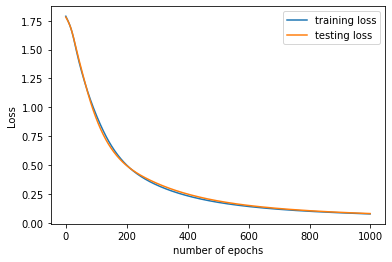

In [ ]:
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='testing loss')
plt.xlabel("number of epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
hidden_layers = [1,2,3] # set the number of hidden layers
history=[]
for hl in hidden_layers:
  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range (hl):  # run a for loop to initialize hidden layers
    model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal,
                                  activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal,activation = tf.nn.softmax))

  model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  hist = model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)
  history.append(hist)

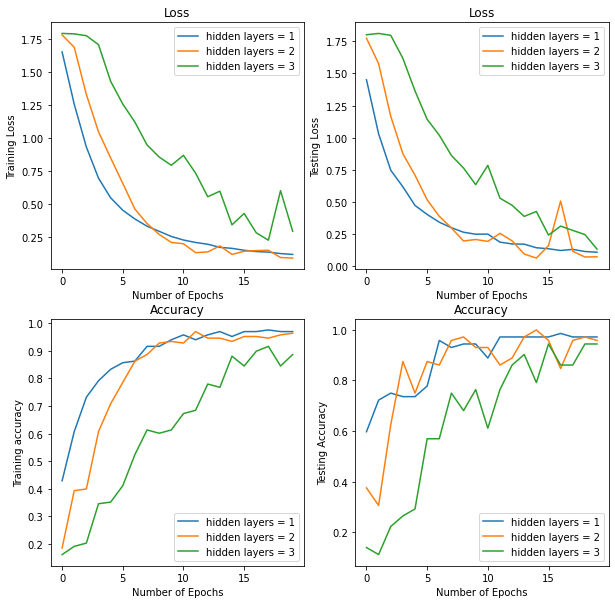

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history[0].history['loss'],label='hidden layers = 1')
plt.plot(history[1].history['loss'],label='hidden layers = 2')
plt.plot(history[2].history['loss'],label='hidden layers = 3')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Loss")
plt.legend()


plt.subplot(2,2,2)
plt.plot(history[0].history['val_loss'],label='hidden layers = 1')
plt.plot(history[1].history['val_loss'],label='hidden layers = 2')
plt.plot(history[2].history['val_loss'],label='hidden layers = 3')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Loss")
plt.title("Loss")
plt.legend()


plt.subplot(2,2,3)
plt.plot(history[0].history['accuracy'],label='hidden layers = 1')
plt.plot(history[1].history['accuracy'],label='hidden layers = 2')
plt.plot(history[2].history['accuracy'],label='hidden layers = 3')
plt.xlabel("Number of Epochs")
plt.ylabel("Training accuracy")
plt.title("Accuracy")
plt.legend()



plt.subplot(2,2,4)
plt.plot(history[0].history['val_accuracy'],label='hidden layers = 1')
plt.plot(history[1].history['val_accuracy'],label='hidden layers = 2')
plt.plot(history[2].history['val_accuracy'],label='hidden layers = 3')
plt.xlabel("Number of Epochs")
plt.ylabel("Testing Accuracy")
plt.title("Accuracy")
plt.legend()

We can see that as we go on increasing the number of hidden layers, the loss increases. This is because the parameters haven't been fully trained yet. Running the training for longer epochs will help achieve better resluts but we might run into the problem of overfitting.

# Hyperparameter tuning using Grid Search

In [ ]:
# define a function that accepts the hyperparameters as a grid, creates a model and performs training and testing.
def classification_model(grid): #input argument is a list of hyperparameters
  # assign each element of the grid to the respective hyperparameters
  hidden_layers=grid[0]
  batch_size=grid[1]
  act=grid[2]
  learning_rate=grid[3]

  # select the activation function
  if act == 'sigmoid':
    activation = tf.nn.sigmoid
  elif act == 'tanh':
    activation = tf.nn.tanh
  elif act == 'relu':
    activation = tf.nn.relu
  elif act == 'leaky_relu':
    activation = tf.nn.leaky_relu

  history=[]

  # build the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range (hidden_layers):   # set the specific number of hidden layers
    model.add(tf.keras.layers.Dense(units=64,
                                  kernel_initializer=tf.keras.initializers.random_normal(seed=0),
                                  activation = activation)) #set the specific activation
  model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal(seed=0),activation = tf.nn.softmax))
  model.compile(optimizer = tf.optimizers.SGD(learning_rate=learning_rate),   # set the specific learning rate
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
  model.fit(x_f_train,y_f_train,batch_size=batch_size, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)  #set the specific number of batch size
  
  # model.evaluate() function evaluates the trained model on the test data and return test loss and test accuracy
  test_loss, test_acc = model.evaluate(x_f_test, y_f_test,verbose=0)

  return test_acc

Define a set of grids. Each grid has 4 hyperparameters - 

grid = [number of hidden layers, batch size, activation function, learning rate] 

The range of the hyperparameters are as follows:
1. number of hidden layers = [1,3]
2. batch size = [4,64] (only powers of 2)
3. activation function = 'sigmoid','tanh','ReLU','Leaky ReLU'
4. learning rate = [0.001,0.01,0.1,1]

In [ ]:
# define a set of grids
grid = [[2,4,'relu',0.1],[1,32,'sigmoid',0.1],[1,1,'sigmoid',0.001],[2,64,'relu',1]]
accuracies = []   #create an empty list to store test accuracy for each grid
for grid_val in grid: # loop through each grid
  out_acc = classification_model(grid_val)  # pass the grid as the argument to the function
  accuracies.append(out_acc)  #add the accuracy to the list
best_hp = grid[accuracies.index(max(accuracies))]   # find out the grid which gives the best performance.

In [ ]:
# display the best grid of hyperparameters
best_hp

[2, 4, 'relu', 0.1]

# Final Model

Using the best set of hyperparameters obtained using Grid Search, we will create the final model. 

The best set of hyperparameters are:
1. number of hidden layers = 2 
2. batch size = 4
3. activation function = ReLU
4. learning rate = 0.1  

In [ ]:
#build the final model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

#first hidden layer
model.add(tf.keras.layers.Dense(units=64,
                                kernel_initializer=tf.keras.initializers.random_normal(seed=0),
                                activation = tf.nn.relu))

# second hidden layer
model.add(tf.keras.layers.Dense(units=64,
                                kernel_initializer=tf.keras.initializers.random_normal(seed=0),
                                activation = tf.nn.relu))

# output layer
model.add(tf.keras.layers.Dense(6,kernel_initializer=tf.keras.initializers.random_normal(seed=0),activation = tf.nn.softmax))

# compile the model
model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.1,),
     loss = 'sparse_categorical_crossentropy',
     metrics=['accuracy'])

# run the training loop 
model.fit(x_f_train,y_f_train,batch_size=4, epochs = 20, validation_data=(x_f_test,y_f_test),verbose=0)

# evaluate the trained model on the test dataset
test_loss,test_accuracy = model.evaluate(x_f_test,y_f_test, verbose=0)
print('Model accuracy=',test_accuracy)

Model accuracy= 0.9861111044883728


In [ ]:
# building the confusion matrix

# use the model.predict_classes function predict the class labels for the test data
y_pred = model.predict_classes(x_f_test)

# use the sklearn confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_f_test, y_pred))

[[10  0  0  0  0  0]
 [ 1 14  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 17  0]
 [ 0  0  0  0  0 11]]


# Predict class label of New Observation

In [ ]:
# get the new observation
x_new = x_f_test[25:26]
x_new

array([[-0.05092707, -0.59554076, -0.44819218, -0.41571537]],
      dtype=float32)

In [ ]:
#predict the class for the new observation
y_pred = model.predict_classes(x_new)
print("The predicted class is: ",y_pred)

The predicted class is:  [3]
